In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/expected_goals_and_other_metrics/understat_per_game.csv")
df.head(2)

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.19842,2.57012,1.19842,5,4,2,1,2.3486,w,2014-08-22 19:30:00,1,0,0,3,1.37170,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.19842,-0.6514
1,Bundesliga,2014,a,1.50328,1.30795,1.50328,1.30795,10,1,1,1,1.5143,d,2014-08-30 17:30:00,0,1,0,1,0.19533,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.30795,0.5143


In [3]:
# Understanding the variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,league,6,"[Bundesliga, EPL, La_liga, Ligue_1, RFPL, Seri..."
1,year,6,"[2014, 2015, 2016, 2017, 2018, 2019]"
2,h_a,2,"[h, a]"
3,xG,23935,"[2.57012, 1.50328, 1.22987, 1.03519, 3.48286, ..."
4,xGA,23935,"[1.19842, 1.30795, 0.310166, 0.203118, 0.40284..."
5,npxG,23979,"[2.57012, 1.50328, 1.22987, 1.03519, 3.48286, ..."
6,npxGA,23979,"[1.19842, 1.30795, 0.310166, 0.203118, 0.40284..."
7,deep,38,"[5, 10, 13, 6, 23, 27, 14, 16, 11, 12, 19, 3, ..."
8,deep_allowed,38,"[4, 1, 3, 2, 0, 5, 7, 6, 8, 9, 11, 10, 12, 13,..."
9,scored,11,"[2, 1, 0, 4, 6, 8, 3, 5, 7, 9, 10]"


## **Data Dictionary**

<table style='float:left;'>
    <tr>
        <th style='text-align:center;'>Variable</th>
        <th style='text-align:left;'>Descriptition</th>
    </tr>
    <tr>
        <td style='text-align:left;'>Xg</td>
        <td style='text-align:left;'>expected goals metric, it is a statistical measure of the quality of chances created and conceded. </td>
    </tr>
    <tr>
        <td style='text-align:left;'>xG_diff</td>
        <td style='text-align:left;'>difference between actual goals scored and expected goals. </td>
    </tr>
      <tr>
        <td style='text-align:left;'>npxG</td>
        <td style='text-align:left;'>expected goals without penalties and own goals. </td>
    </tr>   
   <tr>
        <td style='text-align:left;'>xGA</td>
        <td style='text-align:left;'>expected goals against. </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>xGA_diff</td>
        <td style='text-align:left;'>difference between actual goals missed and expected goals against. </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>npxGA</td>
        <td style='text-align:left;'>expected goals against without penalties and own goals.</td>
    </tr> 
    <tr>
        <td style='text-align:left;'>npxGD</td>
        <td style='text-align:left;'>difference between "for" and "against" expected goals without penalties and own goals.</td>
    </tr> 
    <tr>
        <td style='text-align:left;'>ppda_coef</td>
        <td style='text-align:left;'>passes allowed per defensive action in the opposition half (power of pressure) </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>oppda_coef</td>
        <td style='text-align:left;'>opponent passes allowed per defensive action in the opposition half (power of opponent's pressure) </td>
    </tr>
    <tr>
        <td style='text-align:left;'>oppda_att</td>
        <td style='text-align:left;'>opponent attacking actions </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>oppda_def</td>
        <td style='text-align:left;'>opponent defensive actions </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>deep</td>
        <td style='text-align:left;'>passes completed within an estimated 20 yards of goal (crosses excluded) </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>deep_allowed</td>
        <td style='text-align:left;'>opponent passes completed within an estimated 20 yards of goal (crosses excluded) </td>
    </tr> 
    <tr>
        <td style='text-align:left;'>xpts</td>
        <td style='text-align:left;'>expected points</td>
    </tr>
    <tr>
        <td style='text-align:left;'>xpts_diff</td>
        <td style='text-align:left;'>difference between actual and expected points</td>
    </tr> 
    <tr>
        <td style='text-align:left;'>ppda_def</td>
        <td style='text-align:left;'>defensive actions </td>
    </tr>
    <tr> 
        <td style='text-align:left;'>ppda_att</td>
        <td style='text-align:left;'>attacking actions </td>
    </tr>
    <tr> 
        <td style='text-align:left;'>h_a</td>
        <td style='text-align:left;'>home or away game</td>
    </tr>
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        24580 non-null  object 
 1   year          24580 non-null  int64  
 2   h_a           24580 non-null  object 
 3   xG            24580 non-null  float64
 4   xGA           24580 non-null  float64
 5   npxG          24580 non-null  float64
 6   npxGA         24580 non-null  float64
 7   deep          24580 non-null  int64  
 8   deep_allowed  24580 non-null  int64  
 9   scored        24580 non-null  int64  
 10  missed        24580 non-null  int64  
 11  xpts          24580 non-null  float64
 12  result        24580 non-null  object 
 13  date          24580 non-null  object 
 14  wins          24580 non-null  int64  
 15  draws         24580 non-null  int64  
 16  loses         24580 non-null  int64  
 17  pts           24580 non-null  int64  
 18  npxGD         24580 non-nu

In [5]:
df.describe(include = 'all')

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
count,24580,24580.000000,24580,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580,24580,24580.000000,24580.000000,24580.000000,24580.000000,2.458000e+04,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580,24580.000000,24580.000000,24580.000000
unique,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN,NaN,NaN
top,EPL,NaN,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,2019-05-12 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Sociedad,NaN,NaN,NaN
freq,4560,NaN,12290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9189,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228,NaN,NaN,NaN
mean,NaN,2016.478438,NaN,1.309694,1.309694,1.193872,1.193872,5.806957,5.806957,1.341009,1.341009,1.378563,NaN,NaN,0.373841,0.252319,0.373841,1.373841,9.977554e-18,10.904386,239.612327,24.349593,10.904386,239.612327,24.349593,NaN,-0.031315,-0.031315,0.004723
std,NaN,1.699285,NaN,0.841109,0.841109,0.774719,0.774719,4.048151,4.048151,1.244176,1.244176,0.823751,NaN,NaN,0.483832,0.434352,0.483832,1.315111,1.205702e+00,6.163586,83.998463,7.172098,6.163586,83.998463,7.172098,NaN,0.951362,0.951362,1.051608
min,NaN,2014.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-6.007965e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-5.943560,-5.943560,-2.965500
25%,NaN,2015.000000,NaN,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-7.306208e-01,6.962963,179.000000,19.000000,6.962963,179.000000,19.000000,NaN,-0.593431,-0.593431,-0.679800
50%,NaN,2016.000000,NaN,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000e+00,9.500000,231.000000,24.000000,9.500000,231.000000,24.000000,NaN,0.092995,0.092995,0.093950
75%,NaN,2018.000000,NaN,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,NaN,NaN,1.000000,1.000000,1.000000,3.000000,7.306208e-01,13.095622,290.000000,29.000000,13.095622,290.000000,29.000000,NaN,0.588477,0.588477,0.739575


There are six leagues and **168** teams. 

The data contains statistics between **2014** and **2019**.

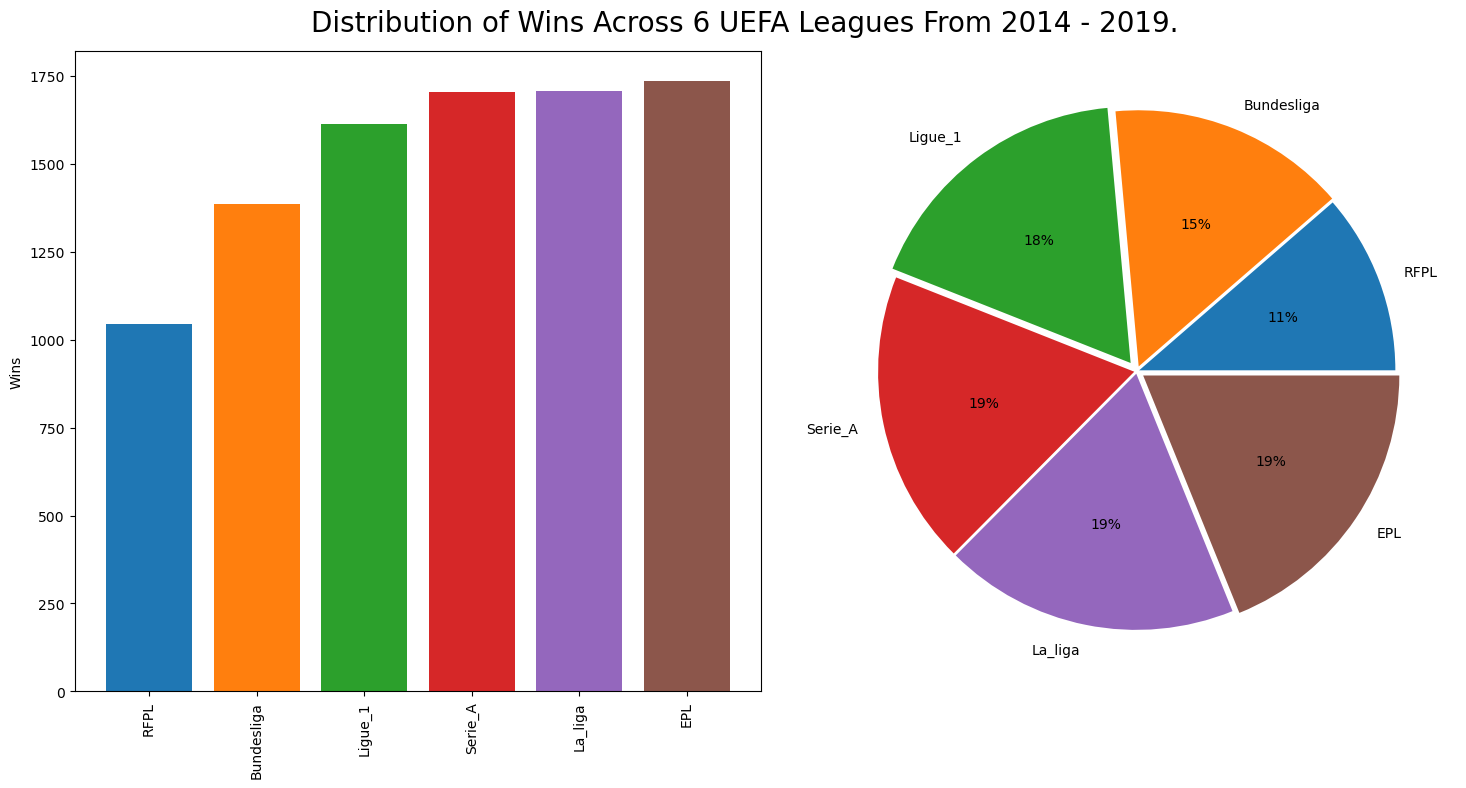

In [6]:
# Number of games won by leagues (%)
plt.figure(figsize = [15,8])

wins_by_league = df.groupby("league")["wins"].sum(
    ).sort_values(ascending = True)

plt.subplot(1,2,1)
plt.bar(
    x = wins_by_league.index,
    height = wins_by_league,
    color = sns.color_palette()
)
plt.ylabel("Wins")
plt.xticks(rotation = 90);
plt.suptitle("Distribution of Wins Across 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);

plt.subplot(1,2,2)
explode = np.array([0.01, 0.02, 0.04, 0.01, 0.01, 0.03])
plt.pie(x = wins_by_league, labels = wins_by_league.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()

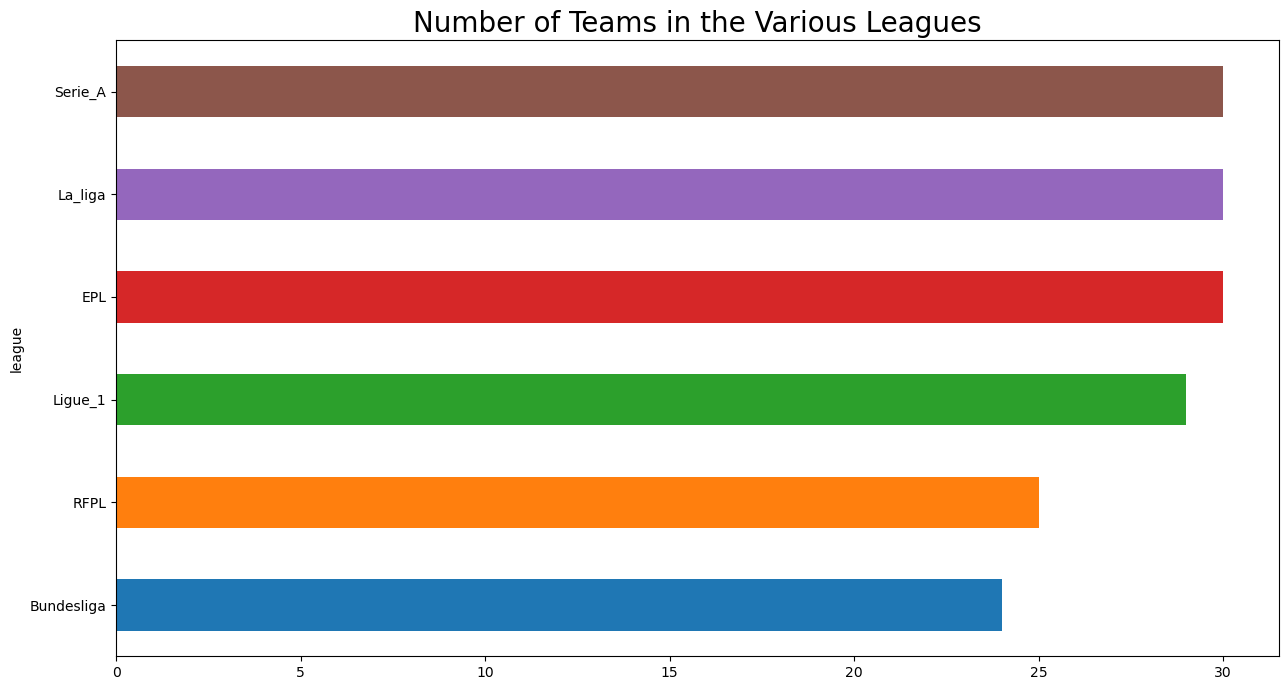

In [7]:
#Teams in each league
plt.figure(figsize = [15, 8])
palette = sns.color_palette()
(df.groupby('league').team.nunique().sort_values()).plot.barh(color=palette);
plt.title("Number of Teams in the Various Leagues", fontsize = 20);

**Serie_A, La_liga & EPL** have the highest number of teams participation

In [8]:
def total_wins_plot(df, color):
    """This function plots the total number of games won by the top teams in a particular league.

    Args:
        df (pandas.core.frame.DataFrame): DataFrame of stats from a particular league.
        color (hex code): This is the hex code for the theme color of the particular league.
                                eg: "#38003c" could be passed for premier league
    """
    plt.figure(figsize = [15, 8])

    df.groupby("team")["wins"].sum().sort_values().tail(10).plot(kind = "barh", color = color)

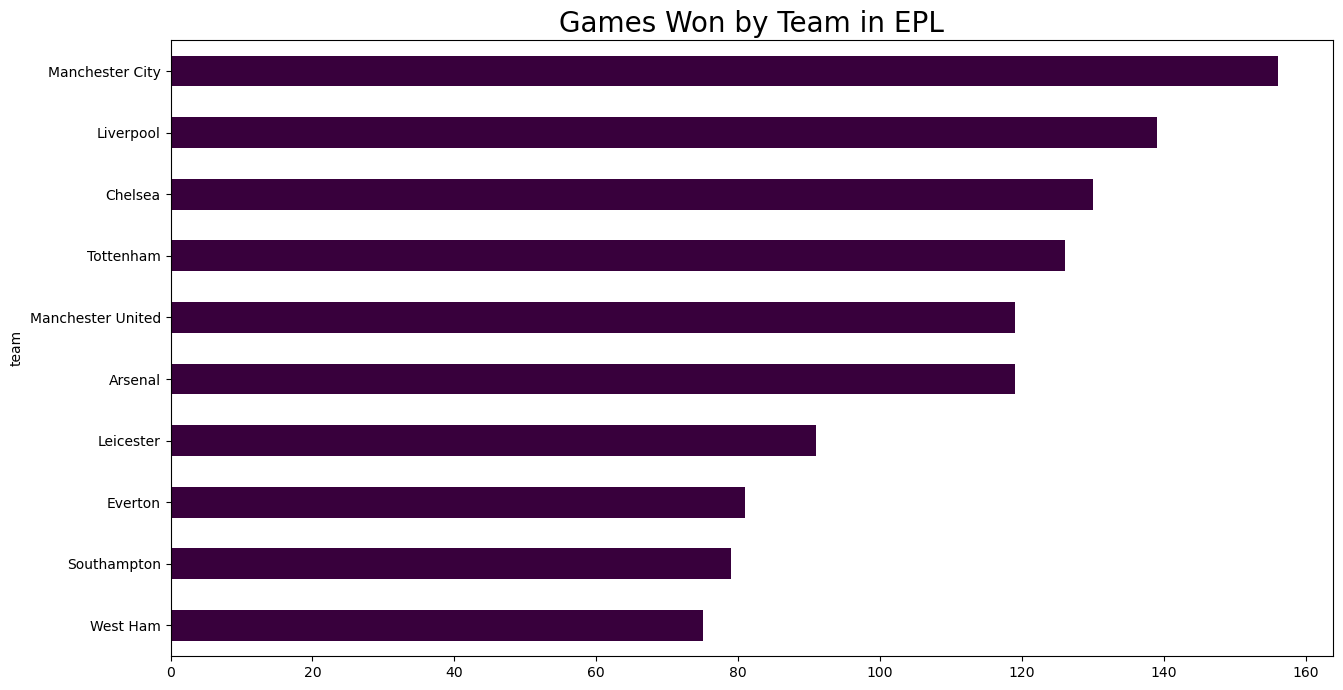

In [9]:
EPL_df = df[df.league=='EPL']
total_wins_plot(EPL_df, color = "#38003c")
plt.title('Games Won by Team in EPL', fontsize = 20);

**Manchster city** won the most games in the **EPL** league

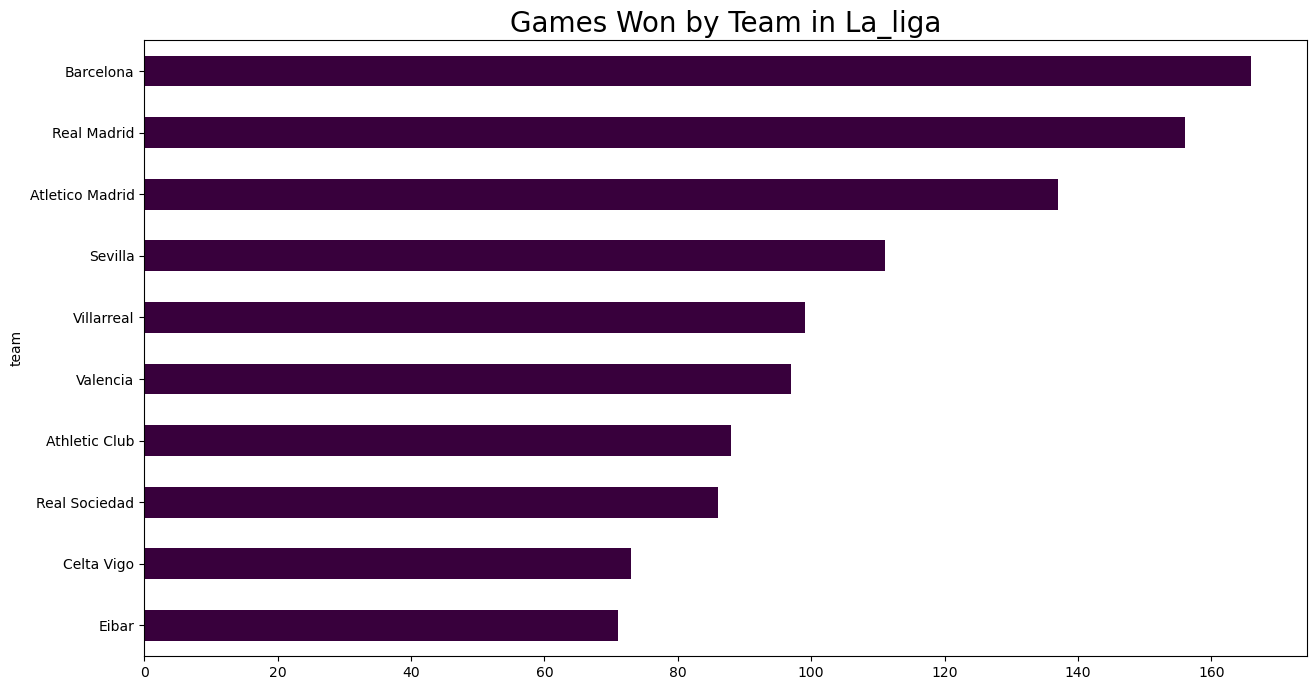

In [10]:
La_liga = df[df.league=='La_liga']
total_wins_plot(La_liga, color = "#38003c")
plt.title('Games Won by Team in La_liga', fontsize = 20);

**Barcelona** has the highest number of wins in the **La_liga** league

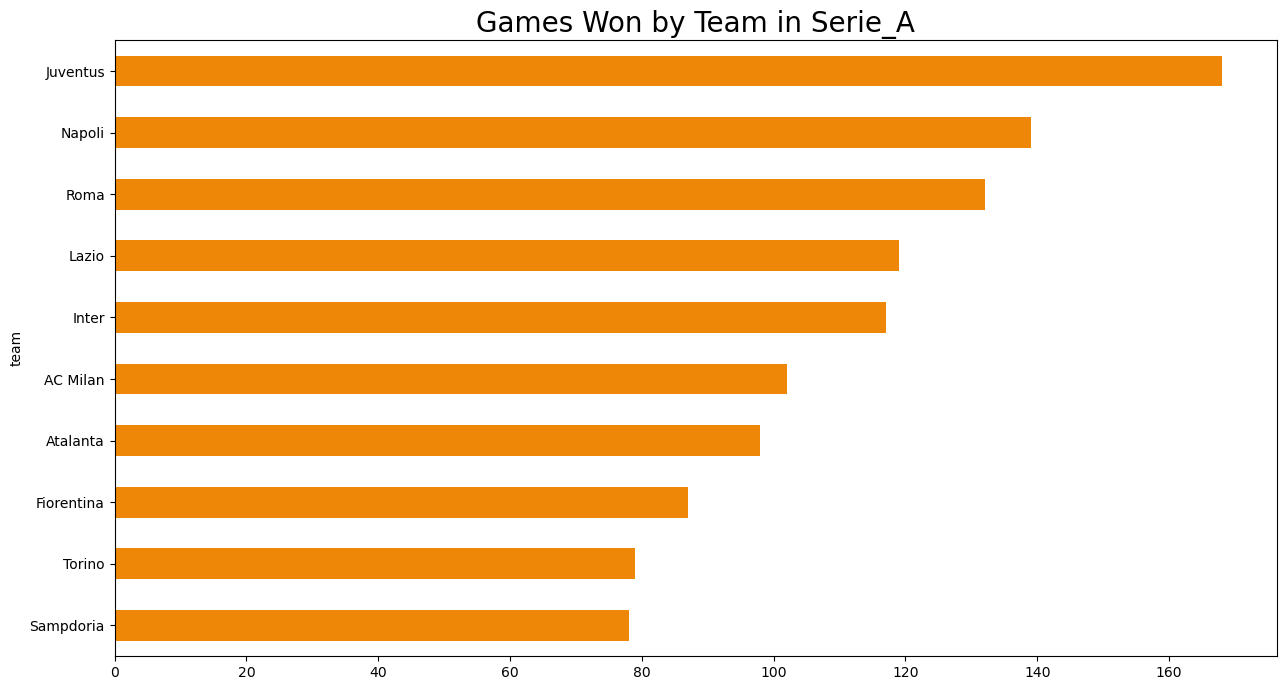

In [11]:
Serie_A = df[df.league=='Serie_A']
total_wins_plot(Serie_A, color = "#ee8707")
plt.title('Games Won by Team in Serie_A', fontsize = 20);

**Juventus** has the highest number of wins in the **Serie_A** league

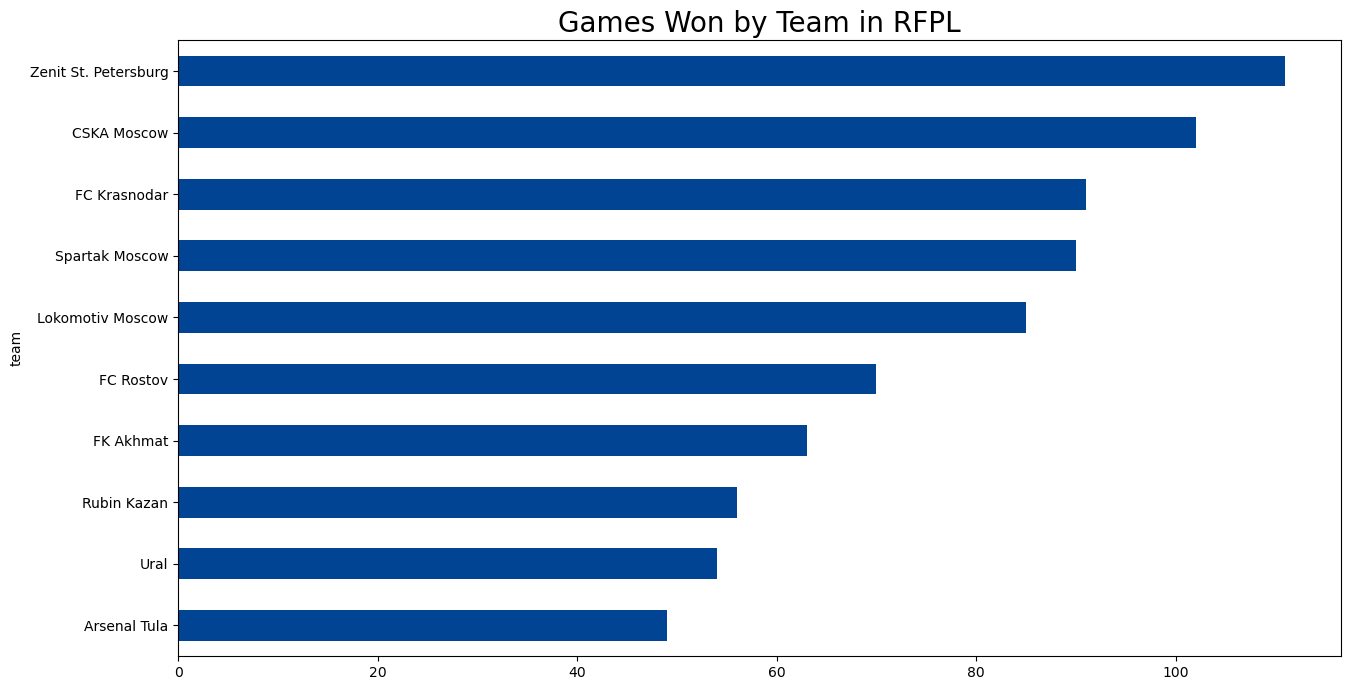

In [12]:

RFPL = df[df.league=='RFPL']
total_wins_plot(RFPL, color = "#024494")
plt.title('Games Won by Team in RFPL', fontsize = 20);

**Zenit St. Petersburg** has the highest number of wins in the **RFPL** league

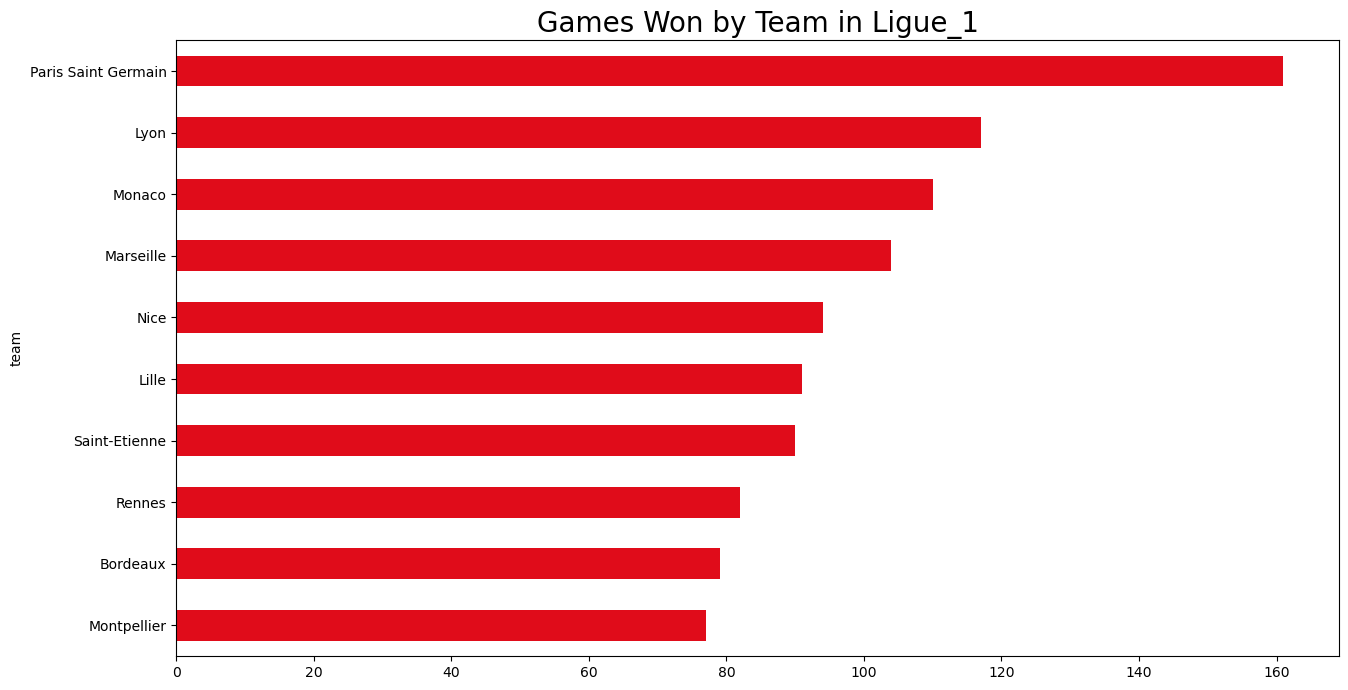

In [13]:
Ligue_1 = df[df.league=='Ligue_1']
total_wins_plot(Ligue_1, color = "#e00c1a")
plt.title('Games Won by Team in Ligue_1', fontsize = 20);

**Paris Sant German** has the highest number of wins in the **Ligue_1** league

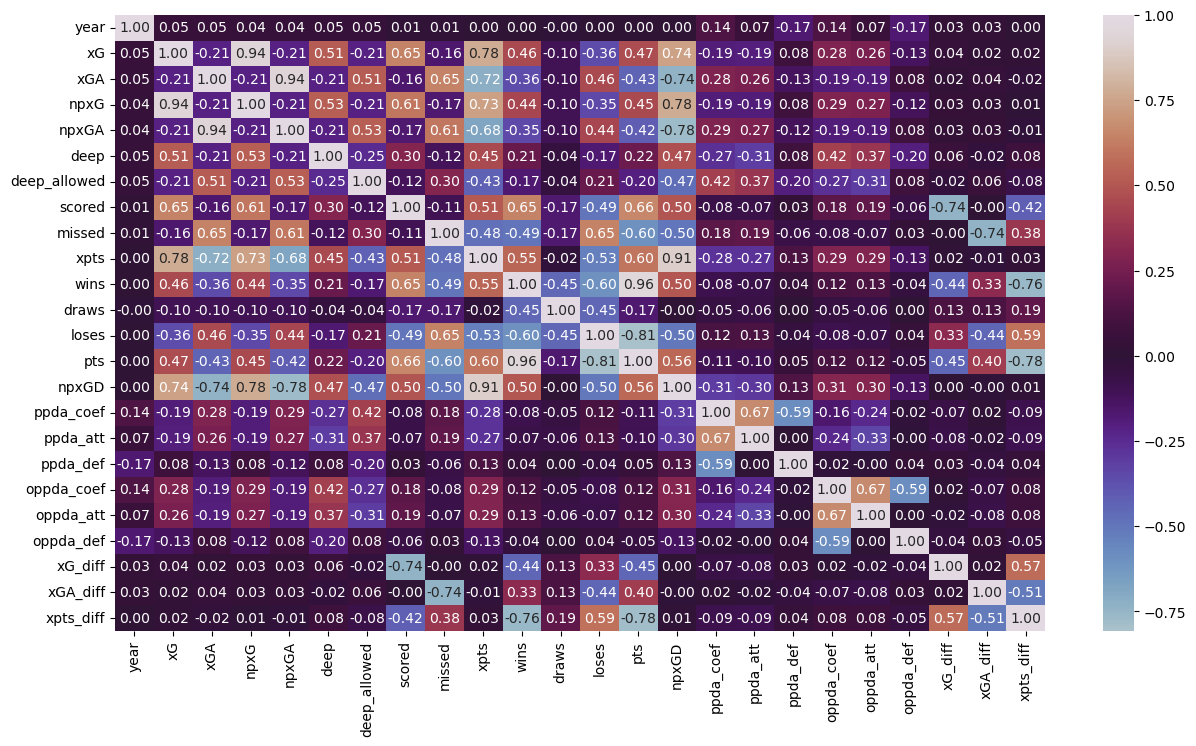

In [14]:
plt.figure(figsize = [15,8])

sns.heatmap(df.corr(), cmap = "twilight", annot = True, fmt =".2f", center = 0);
plt.yticks(rotation = 0);

Lets find the correlaion of the relevant metrics since we can actualy know the difference between expected and actual metrics before a game.

In [15]:
rel_df = df.drop(columns= ['xG_diff', 'xGA_diff', 'npxGD', 'xpts_diff'])

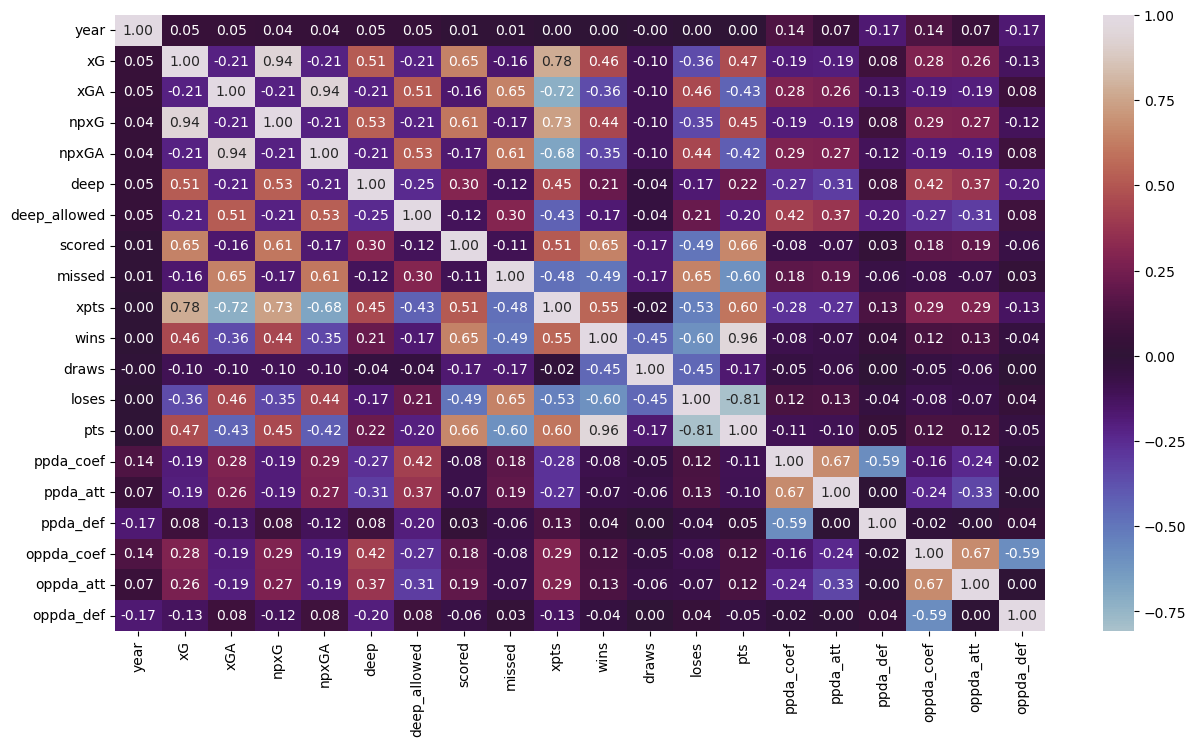

In [16]:
plt.figure(figsize = [15,8])

sns.heatmap(rel_df.corr(), cmap = "twilight", annot = True, fmt =".2f", center = 0);
plt.yticks(rotation = 0);